In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

import joblib

sns.set_style("darkgrid")

In [ ]:
# Load the preprocessed dataset 

df = pd.read_csv("/teamspace/studios/this_studio/Fertiliser_Modelling/data/preprocessed_data_for_fertilzer_classification.csv")

# Preview the first 10 rows of the data
df.head(10)

,simpliedtexture(1),ph,n,p,k,o,ca,mg,cu,fe,zn,soilfertilitystatus,croprecommendation1,croprecommendation2,fertilizerrecommendation1,fertilizerrecommendation2
0,19,-1.314042,-0.062645,-0.425646,-2.831822,-0.184988,-0.779966,1.032378,-0.999140,-1.895471,-0.244818,2,6,5,0,0
1,9,0.062819,-0.062645,0.867893,-2.374031,0.096363,-0.472312,0.816037,-0.999140,1.283516,-0.478647,0,3,0,0,0
2,17,0.407035,-0.035079,-0.377738,-1.951455,1.221765,-0.595373,1.681400,-0.999140,-1.895471,0.222838,0,3,0,0,0
3,9,0.062819,0.020055,1.083483,-1.669738,1.221765,0.142998,1.032378,-0.999140,0.261699,0.807409,0,3,0,0,0
4,3,0.062819,-0.062645,0.867893,-2.338816,1.362440,0.389122,-0.698348,-0.999140,0.602305,0.573581,0,3,0,0,0
5,18,0.062819,-0.021295,1.083483,-0.789372,1.081089,-0.103126,0.383356,-0.999140,-0.646583,2.502665,0,16,10,0,0
6,14,0.407035,-0.007512,0.604394,-2.690963,0.940414,0.081467,0.599696,0.029311,1.510587,-0.069447,0,5,6,0,1
7,3,0.062819,-0.035079,-0.425646,0.971361,-0.044313,-0.226188,-0.482007,1.571987,0.715840,1.976551,0,3,0,0,0
8,8,-0.109288,-0.048862,-1.264052,-0.789372,0.096363,-0.410781,1.032378,-0.999140,0.942910,1.567351,1,3,0,0,0
9,3,-0.453504,-0.062645,-0.353783,0.936146,0.237038,-0.903028,0.816037,-1.513365,1.283516,0.456667,1,8,3,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   simpliedtexture(1)         1000 non-null   int64  
 1   ph                         1000 non-null   float64
 2   n                          1000 non-null   float64
 3   p                          1000 non-null   float64
 4   k                          1000 non-null   float64
 5   o                          1000 non-null   float64
 6   ca                         1000 non-null   float64
 7   mg                         1000 non-null   float64
 8   cu                         1000 non-null   float64
 9   fe                         1000 non-null   float64
 10  zn                         1000 non-null   float64
 11  soilfertilitystatus        1000 non-null   int64  
 12  croprecommendation1        1000 non-null   int64  
 13  croprecommendation2        1000 non-null   int64 

In [4]:
df['fertilizerrecommendation2'].value_counts()

fertilizerrecommendation2
0    820
1    180
Name: count, dtype: int64

Checking at the distribution of the fertiliser there is need for us to balance the class will use SMOTE for that

In [5]:
df = df.drop(columns=['croprecommendation1', 'croprecommendation2', 'fertilizerrecommendation1'])
df.columns

Index(['simpliedtexture(1)', 'ph', 'n', 'p', 'k', 'o', 'ca', 'mg', 'cu', 'fe',
       'zn', 'soilfertilitystatus', 'fertilizerrecommendation2'],
      dtype='object')

In [6]:
# checking for class imbalance

def balance_with_smote(df: pd.DataFrame, target_column: str):
    """
    Apply SMOTE to balance the dataset.

    Parameters:
        df (pd.DataFrame): Input DataFrame (encoded and scaled).
        target_column (str): Name of the target column.

    Returns:
        X_resampled (pd.DataFrame): Resampled feature set.
        y_resampled (pd.Series): Resampled target column.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]

    smote = SMOTE(random_state=142)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Convert back to DataFrame
    X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    y_resampled = pd.Series(y_resampled, name=target_column)

    return X_resampled, y_resampled

In [7]:
X_balanced, y_balanced =balance_with_smote(df = df, target_column = "fertilizerrecommendation2")

In [8]:
print(f"X columns used: \n", X_balanced.columns)
print(f"\ny target columns:", y_balanced.name)

X columns used: 
 Index(['simpliedtexture(1)', 'ph', 'n', 'p', 'k', 'o', 'ca', 'mg', 'cu', 'fe',
       'zn', 'soilfertilitystatus'],
      dtype='object')

y target columns: fertilizerrecommendation2


In [9]:
y_balanced.value_counts()

fertilizerrecommendation2
0    820
1    820
Name: count, dtype: int64

Now we can see the dataset is balanced 

In [10]:
from sklearn.model_selection import train_test_split

# splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.25, random_state=43)

#### 1. Baseline Model

In [11]:
# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# model metrics libraries

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [12]:
# Logistic regression model
log_reg = LogisticRegression(random_state=42)

# Fit the dataset
log_reg.fit(X_train, y_train)

# predict on the Test set
y_pred_log_reg = log_reg.predict(X_test)

In [13]:
# Model Evaluation for Logistic Regression
print("Logistic Regression:")

# Accuracy is the ratio of correctly predicted observation to the total observations.
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_log_reg, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_log_reg, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg, average='macro'):.4f}")

Logistic Regression:
Accuracy: 0.7707
Precision: 0.7992
Recall: 0.7737
F1 Score: 0.7664


In [14]:
print("Classification report:\n", classification_report(y_test, y_pred_log_reg))

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.62      0.73       209
           1       0.70      0.93      0.80       201

    accuracy                           0.77       410
   macro avg       0.80      0.77      0.77       410
weighted avg       0.80      0.77      0.77       410



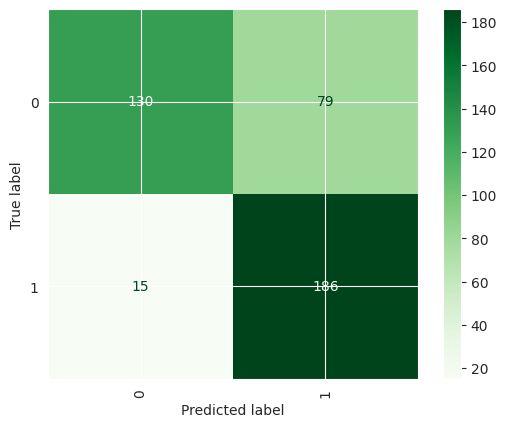

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_log_reg, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
plot_path = 'eda_charts/models_evals/fertilize_log_reg_confusion_matrix.png'
plt.savefig(plot_path)

#### 2. Decison Tree Model

In [16]:
# decision trees
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

y_pred_tree = dtree.predict(X_test)

In [17]:
print("Decision tree classifier:")

# Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_tree, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_tree, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall.
print(f"F1 Score: {f1_score(y_test, y_pred_tree, average='macro'):.4f}")

Decision tree classifier:
Accuracy: 0.8512
Precision: 0.8514
Recall: 0.8515
F1 Score: 0.8512


In [ ]:
print("Classification report:\n", classification_report(y_test, y_pred_tree))

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       209
           1       0.84      0.87      0.85       201

    accuracy                           0.85       410
   macro avg       0.85      0.85      0.85       410
weighted avg       0.85      0.85      0.85       410



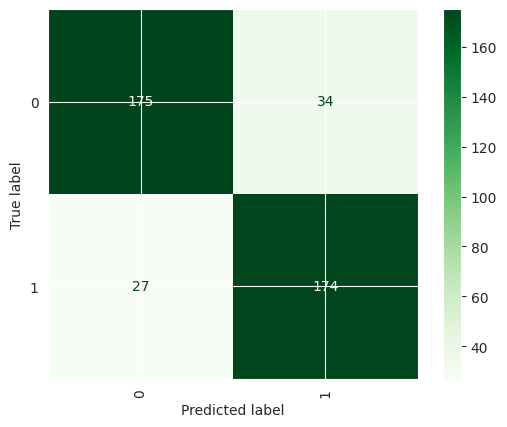

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_tree, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
plot_path = 'eda_charts/models_evals/fertiliser_decision_tree_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [20]:
# Save the model to a file
joblib.dump(dtree, 'models/Fertilizer_decisionTree_Classifier_model.joblib')

print("Decision Tree Classifier models saved to: models/Fertiliser_decisionTree_Classifier_model")

Decision Tree Classifier models saved to: models/Fertiliser_decisionTree_Classifier_model


#### 3. Random Forest

In [21]:
# Random forest classifier
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=142)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf.predict(X_test)

In [ ]:
# Model Evaluation for Random Forest
print("\nRandom Forest:")

# Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall. It tries to find the balance between precision and recall.
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")


Random Forest:
Accuracy: 0.8609756097560975
Precision: 0.8631
Recall: 0.8617
F1 Score: 0.8609


In [23]:
print("Classification report:\n", classification_report(y_test, y_pred_rf))

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       209
           1       0.83      0.90      0.86       201

    accuracy                           0.86       410
   macro avg       0.86      0.86      0.86       410
weighted avg       0.86      0.86      0.86       410



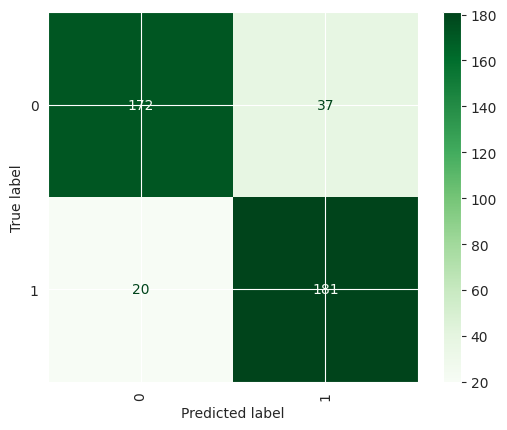

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
plot_path = 'eda_charts/models_evals/Fertiliser_random_forest_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [25]:
# Save the model to a file
joblib.dump(rf, "models/Fertilizer_randomForest_Classifier_Model.joblib")

print("Random Forest Classifier saved to: models/Fertiliser_randomForest_Classifier")

Random Forest Classifier saved to: models/Fertiliser_randomForest_Classifier


#### 4. Gradient Boosting Machine

In [26]:
from xgboost import XGBClassifier

In [27]:
# xg boost

# initialise the model
xgb = XGBClassifier(random_state=142)

# Fit the model
xgb.fit(X_train, y_train)

# predict the test set
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Model Evaluation for XGBoost
print("\nGradient Boosting Machine (XGBoost):")

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

print(f"Precision: {precision_score(y_test, y_pred_xgb, average='macro'):.4f}")

print(f"Recall: {recall_score(y_test, y_pred_xgb, average='macro'):.4f}")

print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='macro'):.4f}")


Gradient Boosting Machine (XGBoost):
Accuracy: 0.8878
Precision: 0.8881
Recall: 0.8881
F1 Score: 0.8878


In [ ]:
print("Classification report:\n", classification_report(y_test, y_pred_xgb))

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       209
           1       0.87      0.91      0.89       201

    accuracy                           0.89       410
   macro avg       0.89      0.89      0.89       410
weighted avg       0.89      0.89      0.89       410



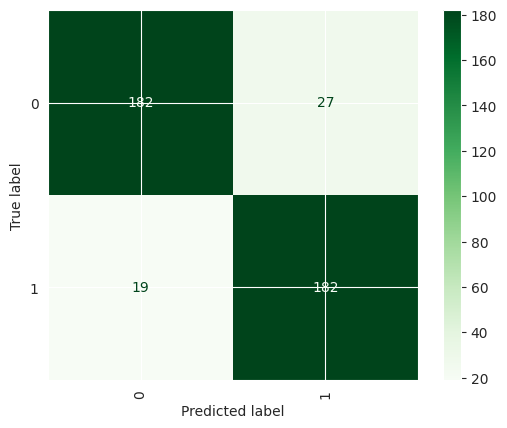

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
plot_path = 'eda_charts/models_evals/Fertiliser_xgboost_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [31]:
# Save the model to a file
joblib.dump(rf, "models/Fertilizers_xgb_Classifier_Model.joblib")

print("Gradient Boosting Classifier saved to: models/Fertiliser_xgboost_Classifier")

Gradient Boosting Classifier saved to: models/Fertiliser_xgboost_Classifier
